# Classification with Support Vector Machines

### Imports

In [26]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Load Data

In [27]:
df = pd.read_csv('../../data/00-raw-data/wiki-crawl-results.csv')

### Re-format data

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

index = 0 : label = Women's rights
index = 1 : label = Men's rights


### Vectorize

In [29]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(420, 9960) (420,) (420,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = 0.7983


In [30]:
np.unique(y1, return_counts=True)

(array([0, 1]), array([291, 129], dtype=int64))

### Baseline: Random Classifier

In [31]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(y1)


-----RANDOM CLASSIFIER-----
count of prediction: dict_values([195, 225])
probability of prediction: [0.46428571 0.53571429]
accuracy 0.48095238095238096
precision, recall, fscore, (array([0.68717949, 0.30222222]), array([0.4604811 , 0.52713178]), array([0.55144033, 0.38418079]), array([291, 129], dtype=int64))


### Split Data

In [32]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0, stratify=y1)
y_train=y_train.flatten()
y_test=y_test.flatten()

In [33]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (336, 9960)
<class 'numpy.ndarray'> (336,)
<class 'numpy.ndarray'> (84, 9960)
<class 'numpy.ndarray'> (84,)


In [34]:
accuracy_training_l = []
accuracy_test_l = []

### Train Linear Kernel

In [35]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model = model.fit(x_train, y_train)

### Check the Results

In [36]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

In [37]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING (Linear)------
ACCURACY: 0.9732142857142857
RECALL: 0.9732142857142857
PRECISION: 0.974048257217117


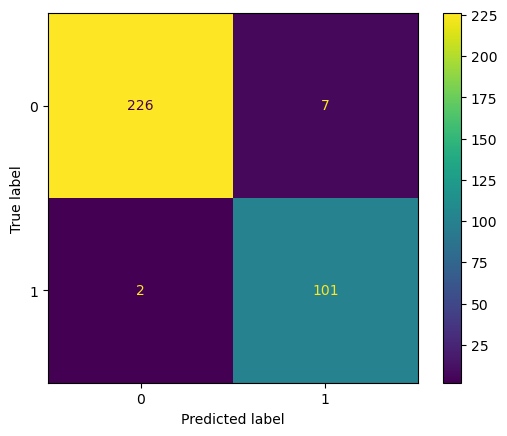

------TEST (Linear)------
ACCURACY: 0.8333333333333334
RECALL: 0.8333333333333334
PRECISION: 0.8394607843137255


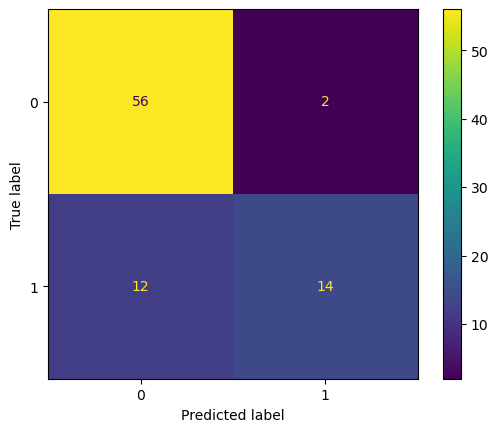

In [38]:
print("------TRAINING (Linear)------")
confusion_plot(y_train,yp_train)
print("------TEST (Linear)------")
confusion_plot(y_test,yp_test)

### Train Gaussian Kernel

In [39]:
model = SVC(kernel='rbf')
model = model.fit(x_train, y_train)

### Check the Results

In [40]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Gaussian)------
ACCURACY: 0.9732142857142857
RECALL: 0.9732142857142857
PRECISION: 0.974048257217117


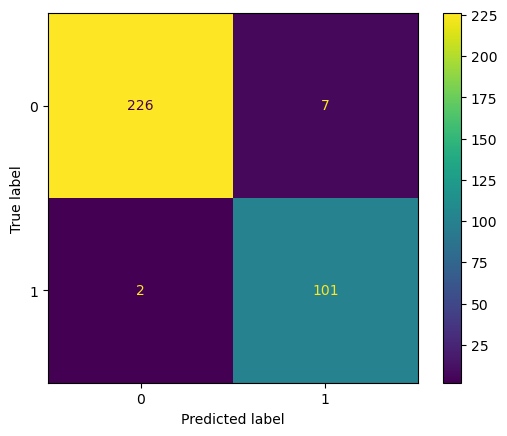

------TEST (Gaussian)------
ACCURACY: 0.7619047619047619
RECALL: 0.7619047619047619
PRECISION: 0.7886904761904762


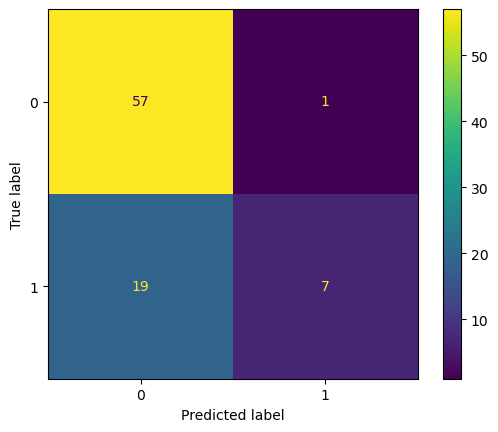

In [41]:
print("------TRAINING (Gaussian)------")
confusion_plot(y_train,yp_train)
print("------TEST (Gaussian)------")
confusion_plot(y_test,yp_test)

### Train Sigmoid Kernel

In [42]:
model = SVC(kernel='sigmoid')
model = model.fit(x_train, y_train)

### Check the Results

In [43]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.9494047619047619
RECALL: 0.9494047619047619
PRECISION: 0.9502156306214575


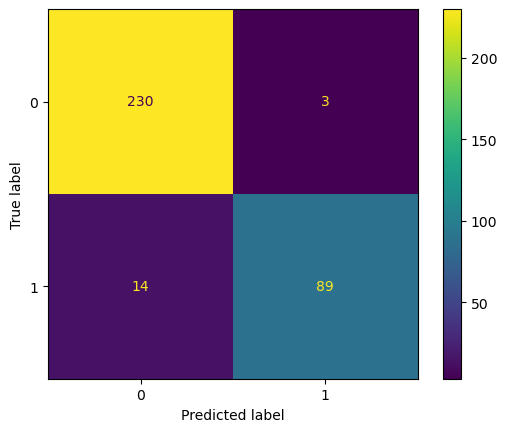

------TEST (Sigmoid)------
ACCURACY: 0.8214285714285714
RECALL: 0.8214285714285714
PRECISION: 0.8581213307240704


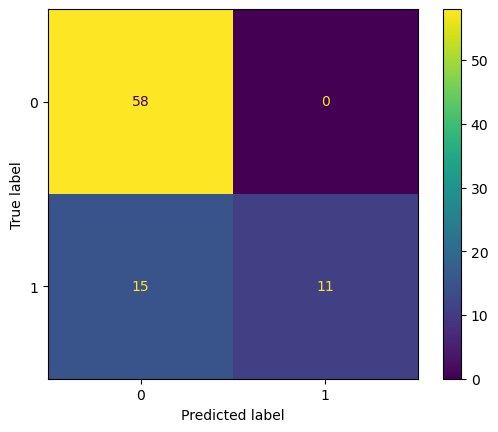

In [44]:
print("------TRAINING (Sigmoid)------")
confusion_plot(y_train,yp_train)
print("------TEST (Sigmoid)------")
confusion_plot(y_test,yp_test)

### Polynomial Kernel Hyperparameter Tuning

degree :  training acc , test acc
1 :  0.9702380952380952 , 0.8214285714285714
degree :  training acc , test acc
2 :  0.9047619047619048 , 0.6904761904761905
degree :  training acc , test acc
3 :  0.8690476190476191 , 0.6904761904761905
degree :  training acc , test acc
4 :  0.8511904761904762 , 0.6904761904761905
degree :  training acc , test acc
5 :  0.8511904761904762 , 0.6904761904761905
degree :  training acc , test acc
6 :  0.8363095238095238 , 0.6904761904761905
degree :  training acc , test acc
7 :  0.8333333333333334 , 0.6904761904761905
degree :  training acc , test acc
8 :  0.8303571428571429 , 0.6904761904761905
degree :  training acc , test acc
9 :  0.8303571428571429 , 0.6904761904761905
degree :  training acc , test acc
10 :  0.8273809523809523 , 0.6904761904761905


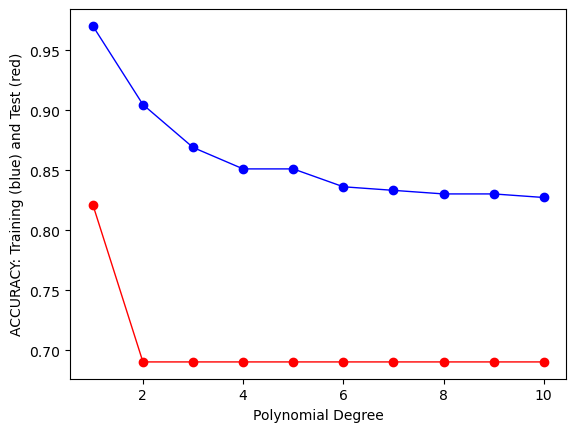

In [45]:
accuracies_train = []
accuracies_test = []
numbers = range(1, 11)

for i in numbers:
    model = SVC(kernel='poly', degree = i)
    model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    
    cm_train = confusion_matrix(y_train, yp_train)
    ac_train = accuracy_score(y_train, yp_train)
    
    cm_test = confusion_matrix(y_test, yp_test)
    ac_test = accuracy_score(y_test, yp_test)
    
    print('degree', ': ', 'training acc' , ',', 'test acc')
    print(i, ": ", ac_train, ',', ac_test)
    
    accuracies_train.append(ac_train)
    accuracies_test.append(ac_test)
    
plt.plot(numbers, accuracies_train, linewidth=1, color='b')
plt.scatter(numbers, accuracies_train, c='b')
plt.plot(numbers, accuracies_test, linewidth=1, color='r')
plt.scatter(numbers, accuracies_test, c='r')
plt.xlabel("Polynomial Degree")
plt.ylabel("ACCURACY: Training (blue) and Test (red)")
plt.style.use('fivethirtyeight')
plt.show();

plt.style.use('default')

### Train Polynomial Kernel

In [46]:
model = SVC(kernel = 'poly', degree = 1)
model = model.fit(x_train, y_train)

### Check the Results

In [47]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.9702380952380952
RECALL: 0.9702380952380952
PRECISION: 0.9704751597608741


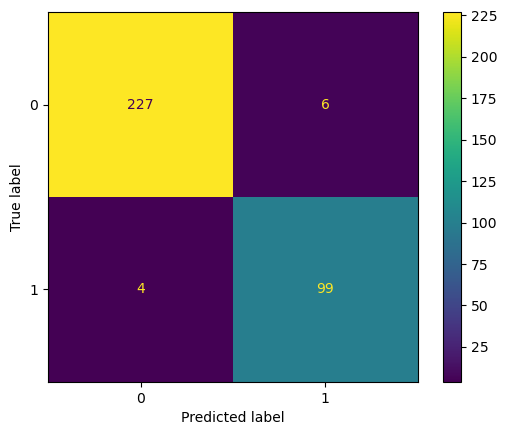

------TEST (Sigmoid)------
ACCURACY: 0.8214285714285714
RECALL: 0.8214285714285714
PRECISION: 0.8400402414486922


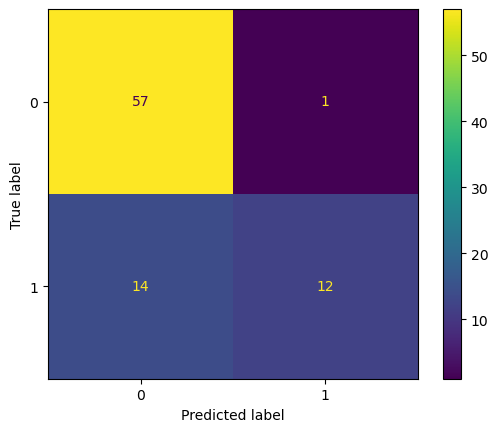

In [48]:
print("------TRAINING (Polynomial; degree=1)------")
confusion_plot(y_train,yp_train)
print("------TEST (Polynomial; degree=1)------")
confusion_plot(y_test,yp_test)

### Comparing Models

In [49]:
kernel_types = ['Linear', 'Gaussian', 'Sigmoid', 'Polynomial']

d = {"Kernels": kernel_types, "Training Accuracy": accuracy_training_l, "Test Accuracy": accuracy_test_l}
df = pd.DataFrame(d)
df = df.sort_values(by=["Test Accuracy"], ascending=False)

[Text(0, 0, 'Linear'),
 Text(1, 0, 'Sigmoid'),
 Text(2, 0, 'Polynomial'),
 Text(3, 0, 'Gaussian')]

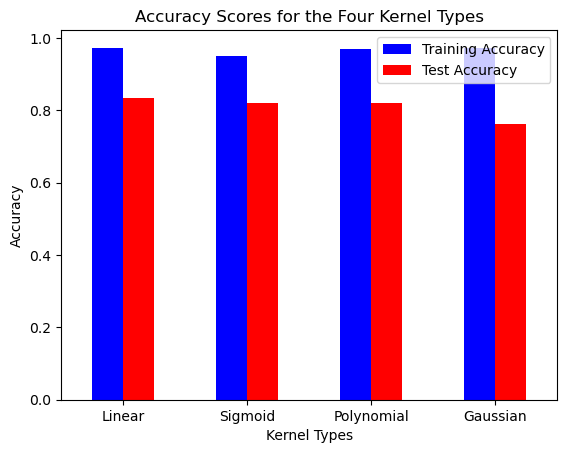

In [50]:
ax = df.plot(kind='bar', color=['b', 'r'])
plt.ylabel('Accuracy')
plt.xlabel('Kernel Types')
plt.title('Accuracy Scores for the Four Kernel Types')
plt.xticks(rotation = 0)
ax.set_xticklabels(df['Kernels'])

In [52]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid', 'polynomial']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.836 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.821 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.3s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.691 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.691 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
  

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'polynomial']},
             verbose=3)

In [53]:
from sklearn.metrics import classification_report

# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.88      0.54      0.67        26

    accuracy                           0.83        84
   macro avg       0.85      0.75      0.78        84
weighted avg       0.84      0.83      0.82        84



### Train Optimal Model

In [54]:
model = SVC(kernel='linear', C=0.1, gamma=1)
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

------TRAINING------
ACCURACY: 0.9732142857142857
RECALL: 0.9732142857142857
PRECISION: 0.974048257217117


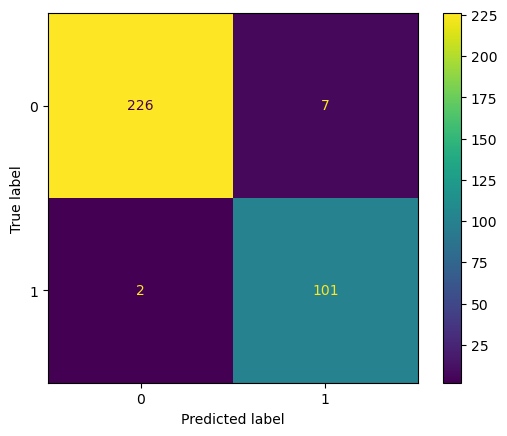

------TEST------
ACCURACY: 0.8333333333333334
RECALL: 0.8333333333333334
PRECISION: 0.8394607843137255


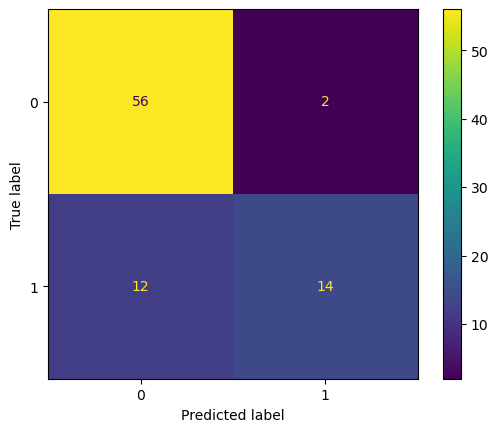

In [55]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)